In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [5]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

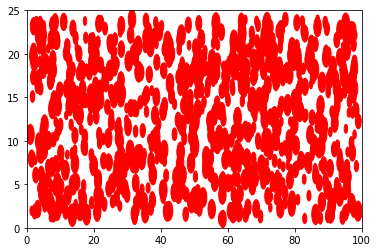

In [6]:
def create_random_porous_media_uniform(height, width, number_of_particles, radius_range, dist=None):
    xx = np.random.uniform(width[0]+1, width[1]-1, (number_of_particles, number_of_particles))
    yy = np.random.uniform(height[0]+1, height[1]-1, (number_of_particles, number_of_particles))
    rr = np.random.uniform(radius_range[0], radius_range[1], (number_of_particles, number_of_particles))
    plt.figure(figsize=(20, 20*(height[1]/width[1])))
    fig, ax = plt.subplots()
    for j in range(xx.shape[0]):
        for i in range(xx[j].shape[0]):
            circle1 = plt.Circle((xx[j][i], yy[j][i]), rr[i][j], color='r')
    #         circle1.set_facecolor(None)
            ax.add_artist(circle1)
    plt.xlim(0, width[1])
    plt.ylim(0, height[1])
    # plt.savefig('test.svg')
    return xx, yy, rr
xx, yy, rr = create_random_porous_media_uniform(height=[0, 25], width=[0, 100], number_of_particles=30
                                        , radius_range=[0.5, 1.2])

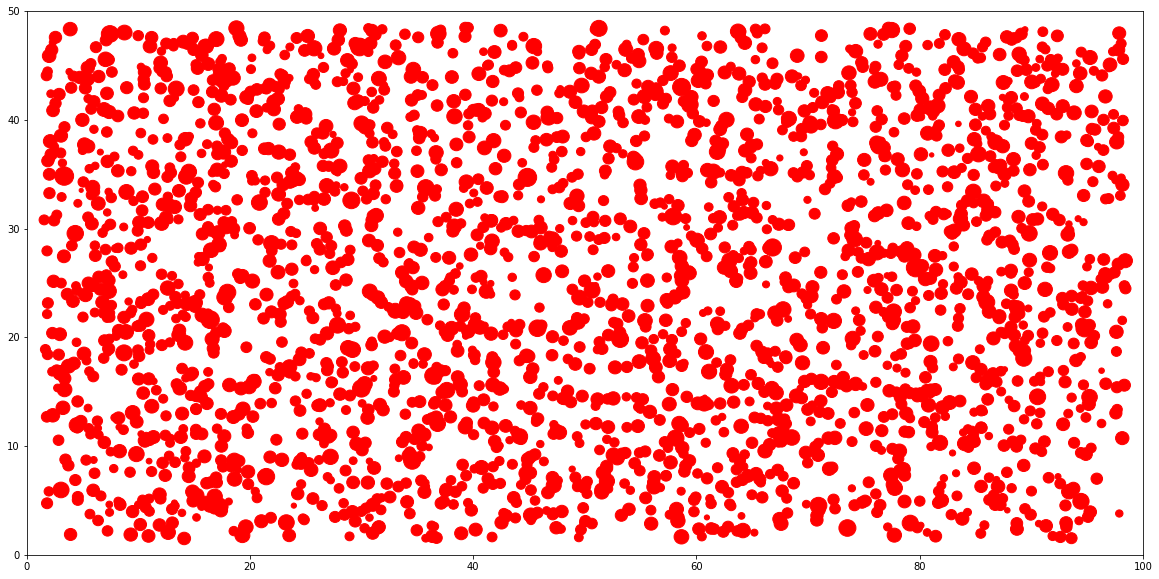

In [7]:
def create_random_porous_media_normal(height, width, number_of_particles, particle_size={'mean':2,"stdev":0.5}, dist=None):
    xx = np.random.uniform(width[0]+particle_size['mean']+1, width[1]-particle_size['mean']-1, (number_of_particles, number_of_particles))
    yy = np.random.uniform(height[0]+particle_size['mean']+1, height[1]-particle_size['mean']-1, (number_of_particles, number_of_particles))
    rr = np.random.normal(particle_size['mean'], particle_size['stdev'], (number_of_particles, number_of_particles))
    plt.figure(figsize=(20, 20*(height[1]/width[1])))
    fig, ax = plt.subplots()
    for j in range(xx.shape[0]):
        for i in range(xx[j].shape[0]):
            circle1 = plt.Circle((xx[j][i], yy[j][i]), rr[i][j], color='r')
    #         circle1.set_facecolor(None)
            ax.add_artist(circle1)
    plt.xlim(0, width[1])
    plt.ylim(0, height[1])
    # plt.savefig('test.svg')
    return xx, yy, rr
factor = 2
plt.rcParams['figure.figsize'] =(factor*10,factor*5)
xx, yy, rr = create_random_porous_media_normal(height=[0, 50], width=[0, 100], number_of_particles=50
                                        , particle_size={'mean': 0.5, "stdev": 0.1})

In [58]:
import ezdxf

dwg = ezdxf.new('AC1015')

dwg.layers.new(name = 'frame')
dwg.layers.new(name = 'media')
msp = dwg.modelspace()
width=100
height=50
points = [(0, 0), (width, 0), (width, height), (0, height), (0,0)]
msp.add_lwpolyline(points,dxfattribs={'layer': 'frame'})


for j in range(xx.shape[0]):
    for i in range(xx[j].shape[0]):
        msp.add_circle((xx[j][i],yy[j][i]),rr[i][j],dxfattribs={'layer':'media'})

dwg.saveas("random_v1.dxf")